<a href="https://colab.research.google.com/github/Dhayo-0z/AI-Bootcamp-Submission-notebook/blob/main/Notebook_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Installing Catboost on colab

In [ ]:
%%capture
!pip install catboost category-encoders

# Importing Libraries

In [ ]:
## Import required libraries
import pandas as pd #for data preprocessing

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Linear Algebra
import numpy as np
 
#Import Datetime module
from datetime import datetime

from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split#For splitting
from category_encoders import TargetEncoder
#Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#To ignore unnecessary warnings
import warnings

from sklearn.preprocessing import LabelEncoder,OneHotEncoder # for encoding categorical variables
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
warnings.filterwarnings("ignore")

# Get the Data

In [ ]:
#For Notebook Locally
train = pd.read_csv("drive/MyDrive/Colab Notebooks/Train.csv")
test = pd.read_csv("drive/MyDrive/Colab Notebooks/Test.csv")

In [ ]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [ ]:
#Dropping the ID column from train and test
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            1568 non-null   int64  
 1   Education_Level          1568 non-null   object 
 2   Marital_Status           1568 non-null   object 
 3   Disposable_Income        1552 non-null   float64
 4   No_of_Kids_in_home       1568 non-null   int64  
 5   No_of_Teen_in_home       1568 non-null   int64  
 6   Date_Customer            1568 non-null   object 
 7   Recency                  1568 non-null   int64  
 8   Discounted_Purchases     1568 non-null   int64  
 9   WebPurchases             1568 non-null   int64  
 10  CatalogPurchases         1568 non-null   int64  
 11  StorePurchases           1568 non-null   int64  
 12  Amount_on_Wines          1568 non-null   int64  
 13  Amount_on_Fruits         1568 non-null   int64  
 14  Amount_on_MeatProducts  

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            672 non-null    int64  
 1   Education_Level          672 non-null    object 
 2   Marital_Status           672 non-null    object 
 3   Disposable_Income        664 non-null    float64
 4   No_of_Kids_in_home       672 non-null    int64  
 5   No_of_Teen_in_home       672 non-null    int64  
 6   Date_Customer            672 non-null    object 
 7   Recency                  672 non-null    int64  
 8   Discounted_Purchases     672 non-null    int64  
 9   WebPurchases             672 non-null    int64  
 10  CatalogPurchases         672 non-null    int64  
 11  StorePurchases           672 non-null    int64  
 12  Amount_on_Wines          672 non-null    int64  
 13  Amount_on_Fruits         672 non-null    int64  
 14  Amount_on_MeatProducts   6

In [ ]:
train.isnull().sum()

Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [ ]:
test.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

# Importing the models

In [ ]:
from lightgbm import LGBMClassifier #install this library using pip install lgbm if you don't have it 
from catboost import CatBoostClassifier #Install this Library using pip install catboost, before importing if you don't have it 
#from rgf import RGFClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier

# Model Evaluation

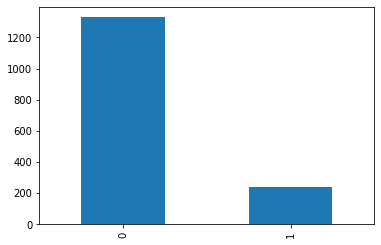

In [ ]:
# Visualizing the target column entries 
train.Response.value_counts().plot(kind='bar')

In [ ]:
# evaluating the model on data

# this is where I create the model, adding my scale_pos_weight = count of zeros(higher) / count of ones(lower)
cat = CatBoostClassifier(verbose=False, scale_pos_weight=5.561, random_seed=42)
xg = XGBClassifier(scale_pos_weight=5.561)
lg = LGBMClassifier( scale_pos_weight=5.561)
rf =  RandomForestClassifier(n_estimators=200, random_state=42)

# function to split the data into train and test including the prediction of the models
def evaluate_model(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Catboost
    cat.fit(X_train, y_train)
    y_pred = cat.predict(X_test)
    print("CatBoost F1 score on validation set is : ",f1_score(y_test,y_pred))
    print('--------'*20)

    # LGBM
    lg.fit(X_train, y_train)
    y_pred = lg.predict(X_test)
    print("LGBM F1 score on validation set is : ",f1_score(y_test,y_pred))
    print('--------'*20)

    # XGBoost
    xg.fit(X_train, y_train)
    y_pred = xg.predict(X_test)
    print("XGBoost F1 score on validation set is : ",f1_score(y_test,y_pred))
    print('--------'*20)

### Encoding
### Categorical Encoding(Target)

In [ ]:
# Target encoding Categorical Variables

def target_encode(cols, train_data, test_data):
    for col in cols:
        target_enc = TargetEncoder() # Instantiate Target Encoder 
        train_data[col] =target_enc.fit_transform(train_data[col], train_data.Response) # Fit transform the encoder on your data
        test_data[col] =  target_enc.transform(test_data[col])

### Feature Engineering

In [ ]:
# converting the data_customer to datetime and creating extra features (year and month)

train['Year_Joined'] = pd.to_datetime(train['Date_Customer']).dt.year
train['Month_Joined'] = pd.to_datetime(train['Date_Customer']).dt.month
# train['Day_Joined'] = pd.to_datetime(train['Date_Customer']).dt.day_name()

test['Year_Joined'] = pd.to_datetime(test['Date_Customer']).dt.year
test['Month_Joined'] = pd.to_datetime(test['Date_Customer']).dt.month
# test['Day_Joined'] = pd.to_datetime(test['Date_Customer']).dt.day_name()

### Filling missing values (median)

In [ ]:
train['Disposable_Income'].fillna((train['Disposable_Income'].median()) , inplace = True)
train.drop('Date_Customer', axis=1, inplace=True)


test['Disposable_Income'].fillna((test['Disposable_Income'].median()) , inplace = True)
test.drop('Date_Customer', axis=1, inplace=True)

Seperating the categorical columns and numerical before calling the function to target encoding the categorical columns

In [ ]:
# separate catgorical and numerical column
# categ_cols == categorical columns . Date column not added
categ_cols = train.select_dtypes(include=['object', 'category']).columns

# num column == numerical columns + date column added
num_cols = [col for col in train.columns if col not in categ_cols]
print(f'The Categorical Columns are: {categ_cols}')
print(f'The Numerical Columns are: {num_cols}')

The Categorical Columns are: Index(['Education_Level', 'Marital_Status'], dtype='object')
The Numerical Columns are: ['Year_of_Birth', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Joined', 'Month_Joined']


In [ ]:
# Call the function that target encodes your data 
target_encode(categ_cols,train, test)

### Validating

Create a copy, extra features and evaluate

In [ ]:
train_copy = train.copy()
train_copy['Customer_Year'] = 2021 - train_copy['Year_Joined'] 
train_copy['Avg_WebPurchase_per_year'] = train_copy.WebPurchases / train_copy.Customer_Year
train_copy['Recency_weeks'] = train_copy['Recency'].apply(lambda x: x/7)

y = train_copy.Response
X = train_copy.drop(['Response'], axis=1)
print(X.columns, X.shape)
train_copy
evaluate_model(X, y)

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Year_Joined', 'Month_Joined',
       'Customer_Year', 'Avg_WebPurchase_per_year', 'Recency_weeks'],
      dtype='object') (1568, 29)
CatBoost F1 score on validation set is :  0.5681818181818181
----------------------------------------------------------------------------------------------------------------------------------------------------------------
LGBM F1 score on validation set is :  0.611764705882353
---------------------------------------------------------------------

In [ ]:
train_copy = train.copy() # Make a copy the train data
train_copy['Customer_Age'] = 2021 - train_copy['Year_Joined'] 
train_copy['Avg_WebPurchase_per_year'] = train_copy.WebPurchases / train_copy.Customer_Age  
train_copy['Recency_weeks'] = train_copy['Recency'].apply(lambda x: x/7)
X = train_copy.drop(['Response'], axis=1)

test_copy = test.copy() # Make a copy of the test data
test_copy['Customer_Age'] = 2021 - test_copy['Year_Joined'] 
test_copy['Avg_WebPurchase_per_year'] = test_copy.WebPurchases / test_copy.Customer_Age  
test_copy['Recency_weeks'] = test_copy['Recency'].apply(lambda x: x/7)

Function for cross validating </br>
storing them in a for loop...

In [ ]:
def stratified_cross_val(X, y, mod, test_data, splits=8, seed=42):
    
    skf =  StratifiedKFold(n_splits=splits, shuffle=True, random_state=seed)

    scores = [] # a list to store our validation scores

    preds = []  # a list to store our prediction per splits

    model = mod # Instantiate your model

    i = 1
    for train, test in skf.split(X, y):
        x_train, x_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        model.fit(x_train, y_train)
        score = f1_score(y_test, model.predict(x_test))
        print(f'Number of splits trained : {i} \t F1 Score:  {score}')
        pred = model.predict_proba(test_data)[:, 1]
        scores.append(score)
        preds.append(pred)
        i += 1

    print('The average F1 Score: ', np.mean(scores)) # The mean of our validation scores

    return preds

### Running the prediction on the test set

In [ ]:
test_copy
preds = stratified_cross_val(X, y, cat,test_copy)

Number of splits trained : 1 	 F1 Score:  0.5454545454545454
Number of splits trained : 2 	 F1 Score:  0.6440677966101694
Number of splits trained : 3 	 F1 Score:  0.6666666666666666
Number of splits trained : 4 	 F1 Score:  0.6567164179104478
Number of splits trained : 5 	 F1 Score:  0.6296296296296297
Number of splits trained : 6 	 F1 Score:  0.6
Number of splits trained : 7 	 F1 Score:  0.5970149253731343
Number of splits trained : 8 	 F1 Score:  0.65625
The average F1 Score:  0.6244749977055741


In [ ]:
preds_mean = np.mean(preds, axis=0) # The average of the predictions per row

final = [] # list to store our final predicitions


for x in preds_mean:
    if x > 0.35:
        final.append(1)
    else:
        final.append(0)


# Create the submission file 

In [ ]:
# Creating the submission file
submission= pd.read_csv('drive/MyDrive/Colab Notebooks/SampleSubmission.csv')
submission.Response= final
submission.to_csv("final_submission", index= False)


# New Section

In [ ]:
# to convert to pdg
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Notebook_submission.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Notebook_submission.ipynb to pdf
[NbConvertApp] Support files will be in Notebook_submission_files/
[NbConvertApp] Making directory ./Notebook_submission_files
[NbConvertApp] Writing 59808 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 60340 bytes to /content/drive/My Drive/Notebook_submission.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'